# Task

In [13]:
from ucimlrepo import fetch_ucirepo
import numpy as np
np.random.seed(0)

## Generate dataset


[(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (None, None)]
Optimal weights: [0.04184623 0.         0.         0.0306116  0.02034362], [0.01114859 0.         0.         0.00378443 0.        ]
Optimal bias: 0.0
Minimum logistic loss: 69.14908501238655


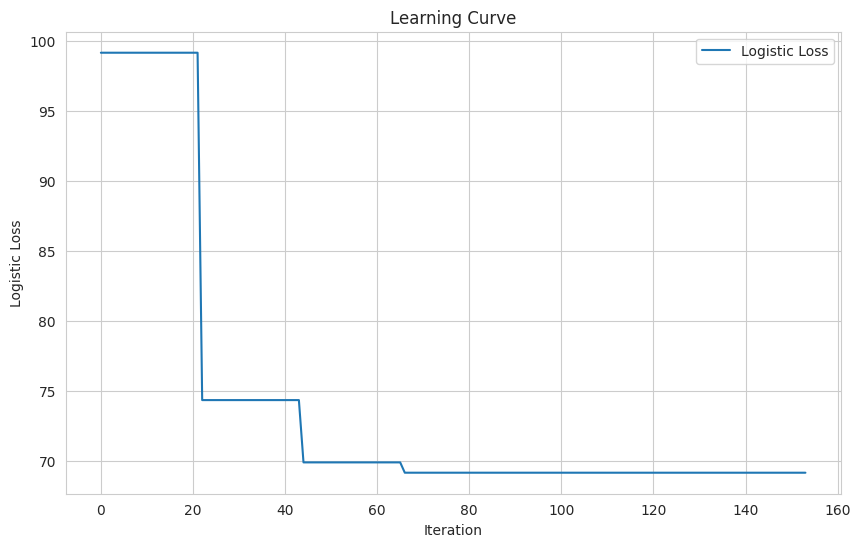

In [39]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# List to store the logistic loss at each iteration
loss_history = []

import numpy as np

def logistic_loss(params, X, y, C=100): 
    n_samples, n_features = X.shape
    n = params[:n_features]
    p = params[n_features:2*n_features]
    b = params[-1]
    w = n - p   
    loss = C * np.mean(np.log(1 + np.exp(-y * (np.dot(X, w) + b)))) + np.sum(n+p)
    
    loss_history.append(loss)
    
    return loss

# synthetic data
n_samples = 1000 
n_features = 10  
X = np.random.randn(n_samples, n_features)
y = np.random.choice([-1, 1], size=n_samples)

# model parameters
bounds = [(0, None)] * n_features + [(0, None)] * n_features + [(None, None)]
print(bounds)
initial_n = 0.01*np.random.normal(0, 1, n_features)
initial_p = 0.01*np.random.normal(0, 1, n_features)
initial_w = initial_n - initial_p
initial_np = np.append(initial_n, initial_p)

initial_b = np.random.normal(0, 1, 1)
initial_params = np.append(initial_np, initial_b)

loss_history.clear()

# minimize function - trust-ncg, L-BFGS-B
result = minimize(logistic_loss, initial_params, args=(X, y), method='L-BFGS-B', bounds=bounds)

# optimal parameters
optimal_params = result.x
optimal_n = optimal_params[:n_features//2]
optimal_p = optimal_params[n_features//2:n_features]
optimal_w = optimal_n - optimal_p
optimal_b = optimal_params[n_features]

print(f"Optimal weights: {optimal_n}, {optimal_p}")
print(f"Optimal bias: {optimal_b}")
print(f"Minimum logistic loss: {result.fun}")

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Logistic Loss')
plt.xlabel('Iteration')
plt.ylabel('Logistic Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

## UCI Dataset

Optimal weights: [0.04184623 0.         0.         0.0306116  0.02034362] [0.01114859 0.         0.         0.00378443 0.        ]
Optimal bias: 0.0
Minimum logistic loss: 5.336144650624566e-06


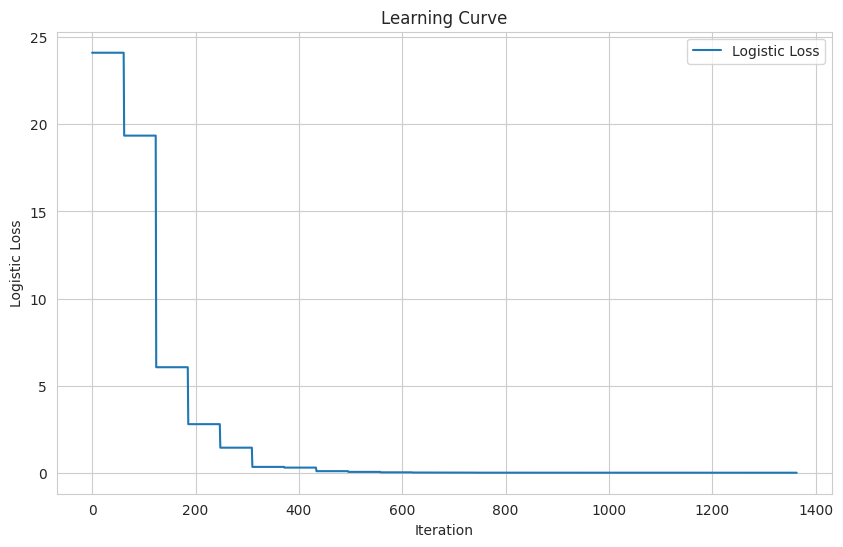

In [40]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# List to store the logistic loss at each iteration
loss_history = []

import numpy as np

def logistic_loss(params, X, y): 
    n_samples, n_features = X.shape
    n = params[:n_features]
    p = params[n_features:2*n_features]
    b = params[-1]
    w = n - p   
    loss = np.mean(np.log(1 + np.exp(-y * np.dot(X, w) + b))) + np.sum(n+p)
    
    loss_history.append(loss)
    
    return loss


breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
X = breast_cancer_wisconsin_diagnostic.data.features.to_numpy()
scaler.fit(X)
X = scaler.transform(X)
y = breast_cancer_wisconsin_diagnostic.data.targets.to_numpy().flatten()
label_mapping = {'M': -1, 'B': 1}
y = np.vectorize(label_mapping.get)(y)
n_samples, n_features = X.shape

# model parameters
bounds = [(0, None)] * n_features + [(0, None)] * n_features + [(None, None)]
initial_n = np.random.normal(0, 1, n_features)
initial_p = np.random.normal(0, 1, n_features)
initial_w = initial_n - initial_p
initial_np = np.append(initial_n, initial_p)

initial_b = np.random.normal(0, 1, 1)
initial_params = np.append(initial_np, initial_b)

loss_history.clear()

# minimize function - trust-ncg, L-BFGS-B
result = minimize(logistic_loss, initial_params, args=(X, y), method='L-BFGS-B', bounds=bounds)

# optimal parameters
optimal_params = result.x
n = optimal_params[:n_features//2]
p = optimal_params[n_features//2:n_features]
w = n - p
b = optimal_params[n_features]

print(f"Optimal weights: {optimal_n} {optimal_p}")
print(f"Optimal bias: {optimal_b}")
print(f"Minimum logistic loss: {result.fun}")

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Logistic Loss')
plt.xlabel('Iteration')
plt.ylabel('Logistic Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()